In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('Social_Network_Ads.csv')

In [18]:
df=df.iloc[:,2:]
df.sample(5)

,Age,EstimatedSalary,Purchased
327,42,75000,0
269,40,61000,0
384,57,33000,1
72,20,23000,0
162,37,33000,0


In [19]:
df.drop('Purchased',axis=1)

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000
...,...,...
395,46,41000
396,51,23000
397,50,20000
398,36,33000


In [20]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split((df.drop('Purchased',axis=1)),df.Purchased,test_size=0.3,random_state=0)

x_train.shape,x_test.shape,y_train.shape,y_test.shape

((280, 2), (120, 2), (280,), (120,))

# Standard Scaler

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(x_train)

#transform train and test set

x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)


In [24]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [25]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [30]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [31]:
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)
x_test_scaled

,Age,EstimatedSalary
0,-0.771013,0.497201
1,0.013305,-0.572804
2,-0.280814,0.150172
3,-0.771013,0.265849
4,-0.280814,-0.572804
...,...,...
115,1.091743,-0.139018
116,0.699584,1.769639
117,-0.672973,0.555039
118,0.797624,0.352606


In [32]:
np.round(x_train_scaled.describe(),2)

,Age,EstimatedSalary
count,280.00,280.00
mean,0.00,0.00
std,1.00,1.00
min,-1.95,-1.58
25%,-0.77,-0.78
50%,-0.08,0.02
75%,0.80,0.53
max,2.17,2.32


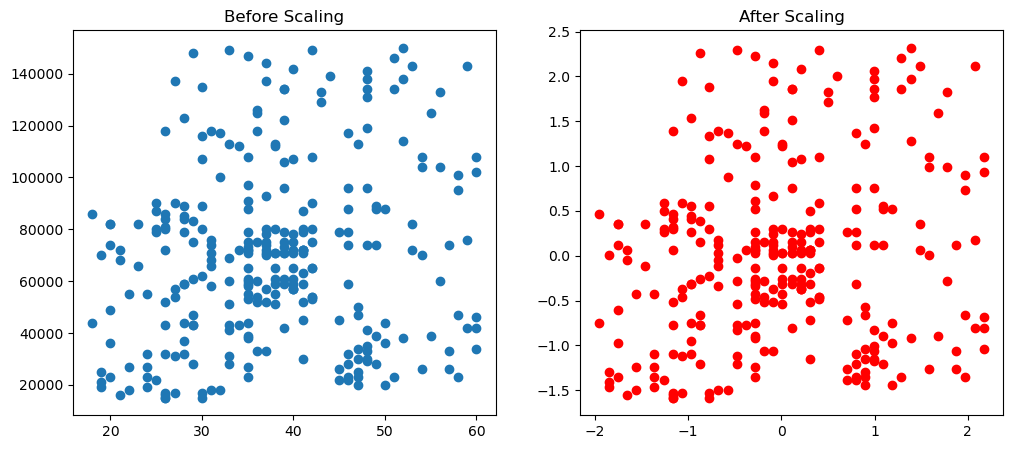

In [38]:
# fig,(ax1,ax2)=plt.subplots(ncol=2,figsize(12,5))
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'])
ax1.set_title('Before Scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='red')
ax2.set_title('After Scaling')
plt.show()

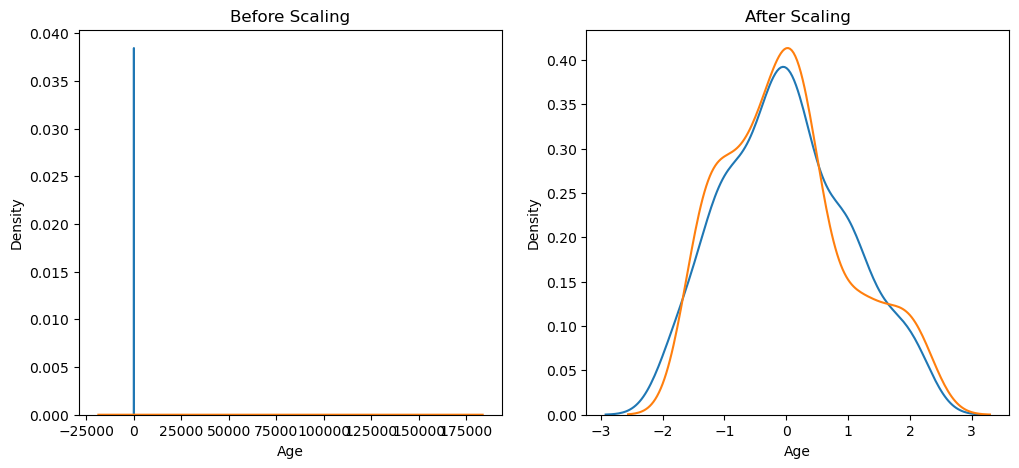

In [41]:
# fig,(ax1,ax2)=plt.subplots(ncol=2,figsize(12,5))
fig, (ax1, ax2) = plt.subplots (ncols=2, figsize=(12, 5))
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)
ax1.set_title('Before Scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
ax2.set_title('After Scaling')
plt.show()

# Comparision of the distribution

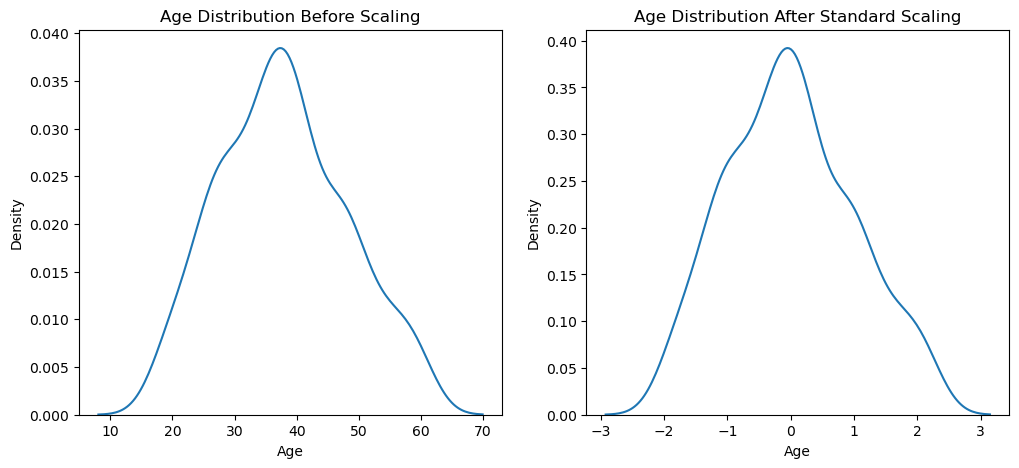

In [43]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(x_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(x_train_scaled['Age'], ax=ax2)
plt.show()

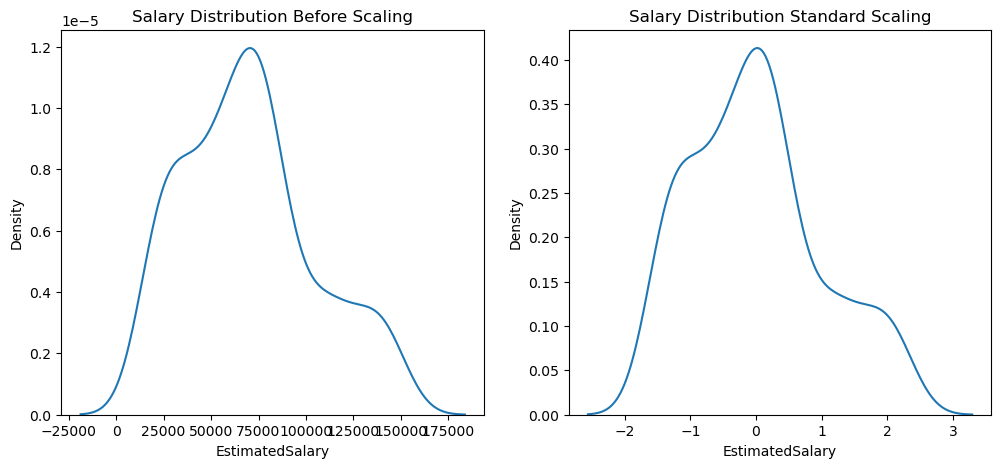

In [44]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(x_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(x_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()


# Why scaling is important

In [45]:
from sklearn.linear_model import LogisticRegression

In [46]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [47]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

LogisticRegression()

In [48]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [49]:
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [50]:
y_pred_scaled

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [51]:
from sklearn.metrics import accuracy_score

In [64]:
print(f"Actual {int(np.ceil(accuracy_score(y_test,y_pred)*100))} % ")
print(f"Scaled {int(np.ceil(accuracy_score(y_test,y_pred_scaled)*100))} % ")


Actual 66 % 
Scaled 87 % 


In [81]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [82]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

In [84]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [85]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


In [86]:
accuracy_score(y_test,y_pred_scaled)

0.8666666666666667

In [87]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


# Effect of outlier

In [88]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)

C:\Users\shubh\AppData\Local\Temp\ipykernel_21712\2365817244.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


In [89]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


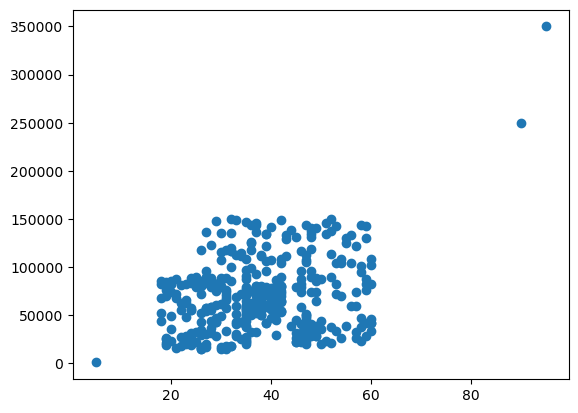

In [90]:
plt.scatter(df.Age,df.EstimatedSalary)

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df.drop('Purchased',axis=1),df.Purchased,test_size=0.3,random_state=0)
x_test.shape, x_train.shape

((121, 2), (282, 2))

In [106]:
x_train=pd.DataFrame(x_train)
x_train

,Age,EstimatedSalary
179,31,34000
219,59,143000
302,37,137000
49,31,89000
241,38,59000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [112]:
x_test=pd.DataFrame(x_test)

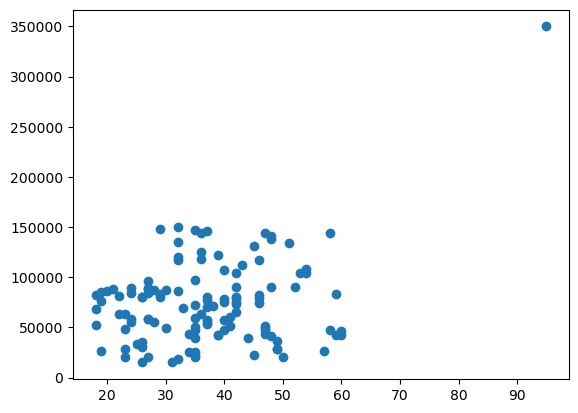

In [113]:
plt.scatter(x_test.Age,x_test.EstimatedSalary)

In [114]:
from sklearn.preprocessing import StandardScaler

In [129]:
scaler=StandardScaler()
scaler.fit(x_train)

,Age,EstimatedSalary
0,-0.287399,-1.335552
1,0.351481,0.166077
2,-0.561205,1.356048
3,-0.926279,0.506069
4,-1.291353,-0.315577
...,...,...
116,-0.287399,-1.250554
117,-0.378667,-1.250554
118,-0.287399,-0.542238
119,-0.104862,-0.343910


In [130]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [131]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [138]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))

#Non Scalled values
sns.scatterplot(data=x_train,x='Age',y='EstimatedSalary',ax=ax1)
ax1.set_title('Before Scaling')
#Scalled values
sns.scatterplot(data=x_train_scaled,x='Age',y='EstimatedSalary',ax=ax2,col)
ax2.set_title('After Scaling')

SyntaxError: positional argument follows keyword argument (2663859685.py, line 7)

In [135]:
x_train_scaled.describe()

,Age,EstimatedSalary
count,2.820000e+02,2.820000e+02
mean,1.921237e-16,6.614095e-17
std,1.001778e+00,1.001778e+00
min,-3.025456e+00,-1.930537e+00
25%,-7.437417e-01,-7.405668e-01
50%,-1.048617e-01,-3.225098e-02
75%,7.165553e-01,4.989859e-01
max,4.732372e+00,5.124288e+00
